In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
car_data = pd.read_csv("F://Analytics path notes//linear regression python doc//Car_Price.csv")

In [4]:
car_data.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV


In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [6]:
car_data.describe(percentiles=[0.5])

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
50%,11500.000000,155.000000,2.200000,2008.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [7]:
car_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [8]:
car_data1 = car_data.dropna(inplace=True,axis=0,how="any")
car_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


In [9]:
print(car_data.describe())

               Price      Mileage      EngineV         Year
count    4025.000000  4025.000000  4025.000000  4025.000000
mean    19552.308065   163.572174     2.764586  2006.379627
std     25815.734988   103.394703     4.935941     6.695595
min       600.000000     0.000000     0.600000  1969.000000
25%      6999.000000    90.000000     1.800000  2003.000000
50%     11500.000000   158.000000     2.200000  2007.000000
75%     21900.000000   230.000000     3.000000  2012.000000
max    300000.000000   980.000000    99.990000  2016.000000


In [10]:
car_data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

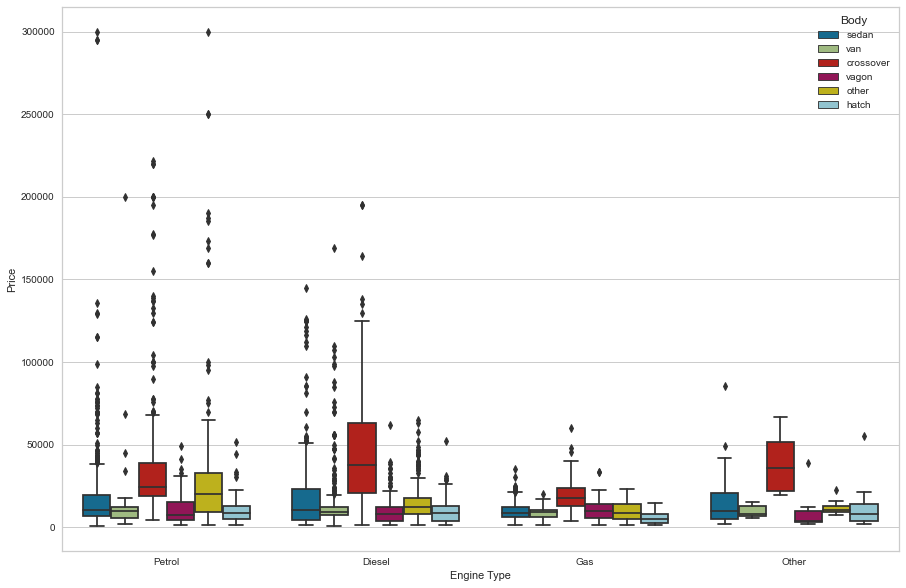

In [11]:
plt.subplots(1, 1, sharey=True, figsize =(15,10))
sns.boxplot("Engine Type","Price",data=car_data,hue='Body')

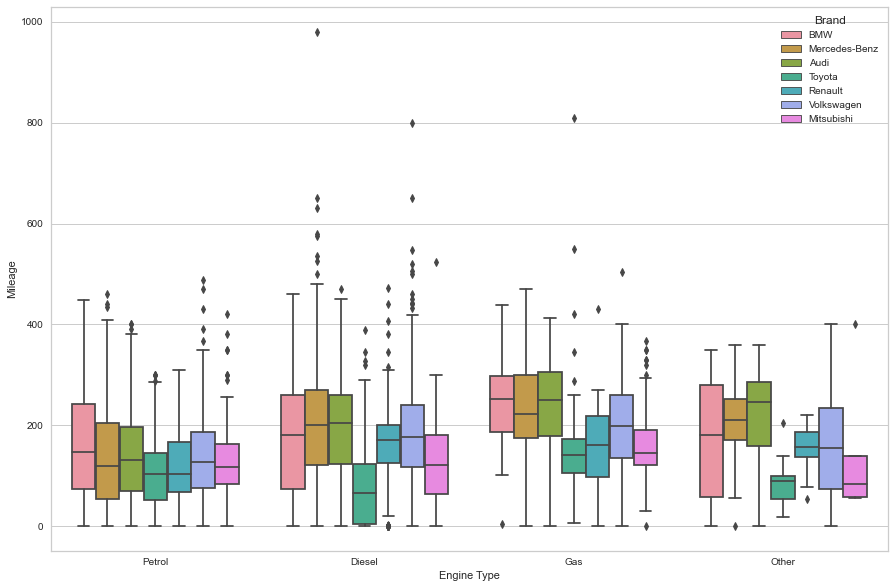

In [12]:
plt.subplots(1, 1, sharey=True, figsize =(15,10))
sns.boxplot("Engine Type","Mileage",data=car_data,hue="Brand")

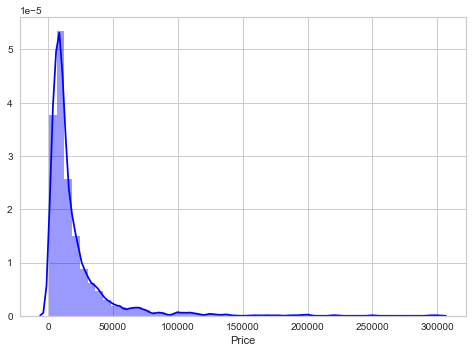

In [13]:
sns.distplot(car_data.Price,hist=True,color="blue")

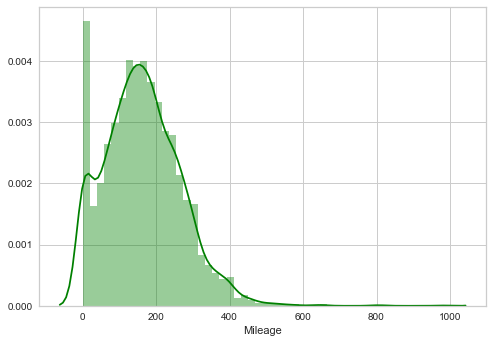

In [14]:
sns.distplot(car_data.Mileage,hist=True,color="green")

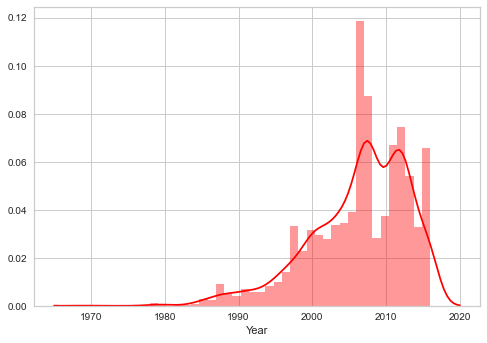

In [15]:
sns.distplot(car_data.Year,hist=True,color="red")

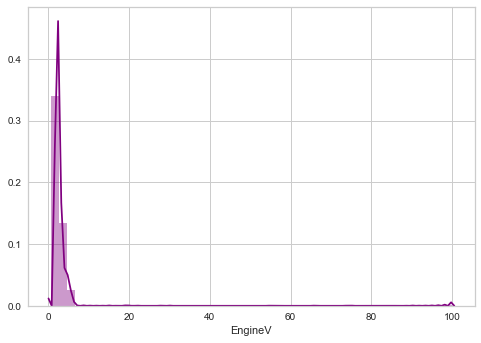

In [16]:
sns.distplot(car_data.EngineV,hist=True,color="purple")

In [17]:
car_data.skew(numeric_only=True)

Price       4.444409
Mileage     0.700196
EngineV    17.154962
Year       -0.963945
dtype: float64

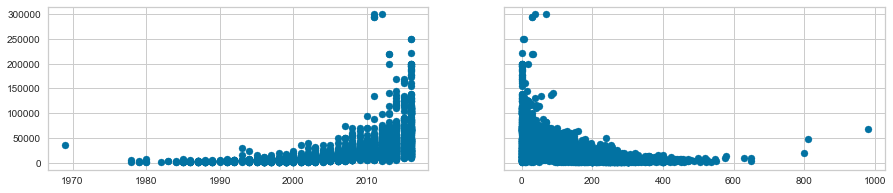

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.scatter(car_data.Year,car_data.Price)
ax2.scatter(car_data.Mileage,car_data.Price)

In [19]:
import numpy as np
from scipy.stats import zscore
housedata_new4 = car_data.iloc[:,[1,3,4]].apply(zscore)
housedata_new3 = car_data[((housedata_new4 > -2.99) & (housedata_new4 < 2.99)).all(axis=1)]
housedata_new3.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


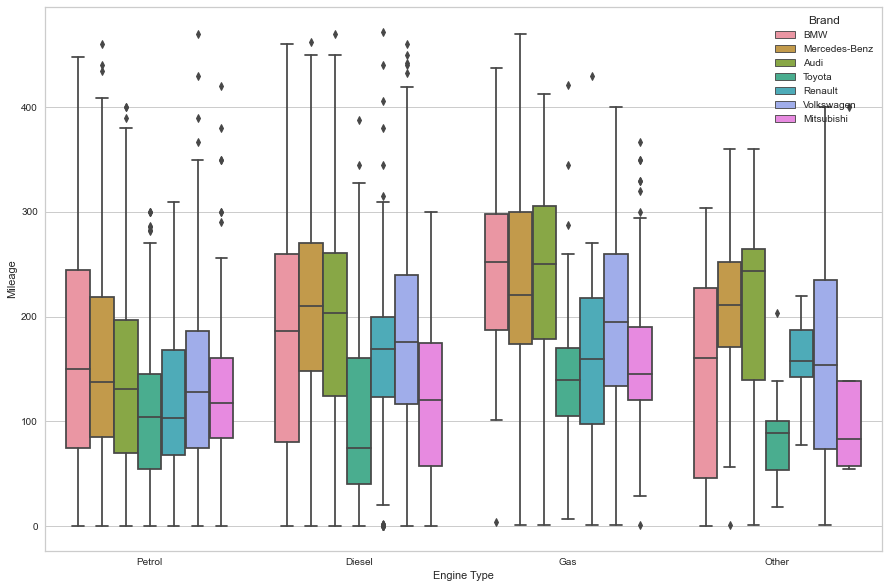

In [20]:
plt.subplots(1, 1, sharey=True, figsize =(15,10))
sns.boxplot("Engine Type","Mileage",data=housedata_new3,hue="Brand")

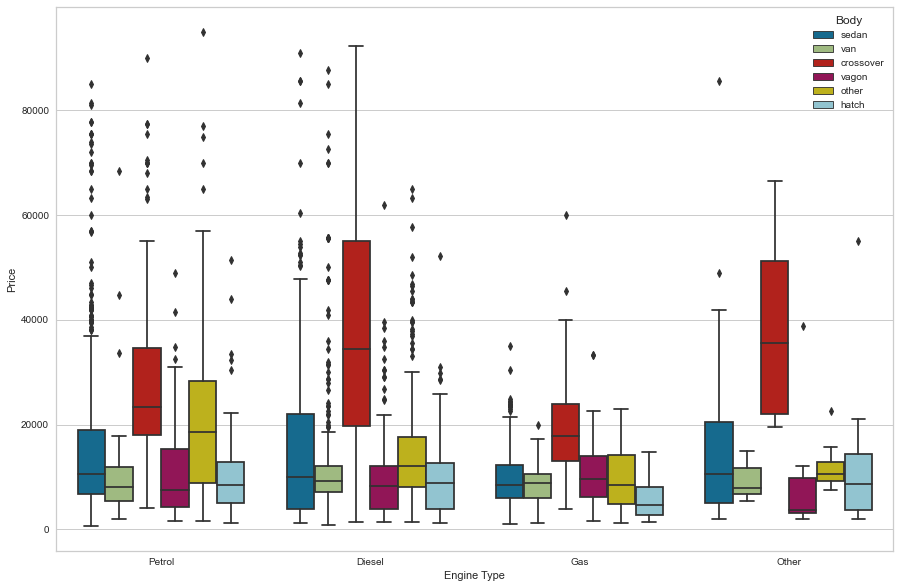

In [21]:
plt.subplots(1, 1, sharey=True, figsize =(15,10))
sns.boxplot("Engine Type","Price",data=housedata_new3,hue='Body')

In [22]:
for k, v in car_data.iloc[:,[1,3,4]].items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(car_data.iloc[:,[1,3,4]])[0]
    print("Column %s outliers = %.2f%%" % (k, perc))    

Column Price outliers = 8.82%
Column Mileage outliers = 0.97%
Column EngineV outliers = 4.80%


In [23]:
Q1 = car_data.quantile(0.25)
Q3 = car_data.quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)
#df = car_data[((car_data.iloc[:,[1,3,4]] < (Q1 - 1.5 * IQR)) | (car_data.iloc[:,[1,3,4]] > (Q3 + 1.5 * IQR))).any(axis=1)]

Price      6999.0
Mileage      90.0
EngineV       1.8
Year       2003.0
Name: 0.25, dtype: float64 Price      21900.0
Mileage      230.0
EngineV        3.0
Year        2012.0
Name: 0.75, dtype: float64 Price      14901.0
Mileage      140.0
EngineV        1.2
Year           9.0
dtype: float64


In [24]:
housedata_new3.describe(percentiles=[0.5])

,Price,Mileage,EngineV,Year
count,3887.000000,3887.000000,3887.000000,3887.000000
mean,16550.073054,165.043221,2.436674,2006.211217
std,15433.388553,96.864937,0.972160,6.600691
min,600.000000,0.000000,0.600000,1969.000000
50%,11300.000000,160.000000,2.200000,2007.000000
max,95000.000000,472.000000,15.000000,2016.000000


In [25]:
df1 = housedata_new3.drop(["Year","Model"],axis=1)
df1.shape

(3887, 7)

In [26]:
data_with_dummies = pd.get_dummies(df1, drop_first=True)
data_with_dummies.shape

(3887, 18)

In [27]:
cols1 = data_with_dummies.columns.values

In [28]:
data_preprocessed = data_with_dummies[cols1]

In [29]:
targets = data_preprocessed['Price']
inputs = data_preprocessed.drop(['Price'],axis=1)
inputs


,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4339,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4341,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4342,194,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [30]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
model.fit(inputs)

StandardScaler()

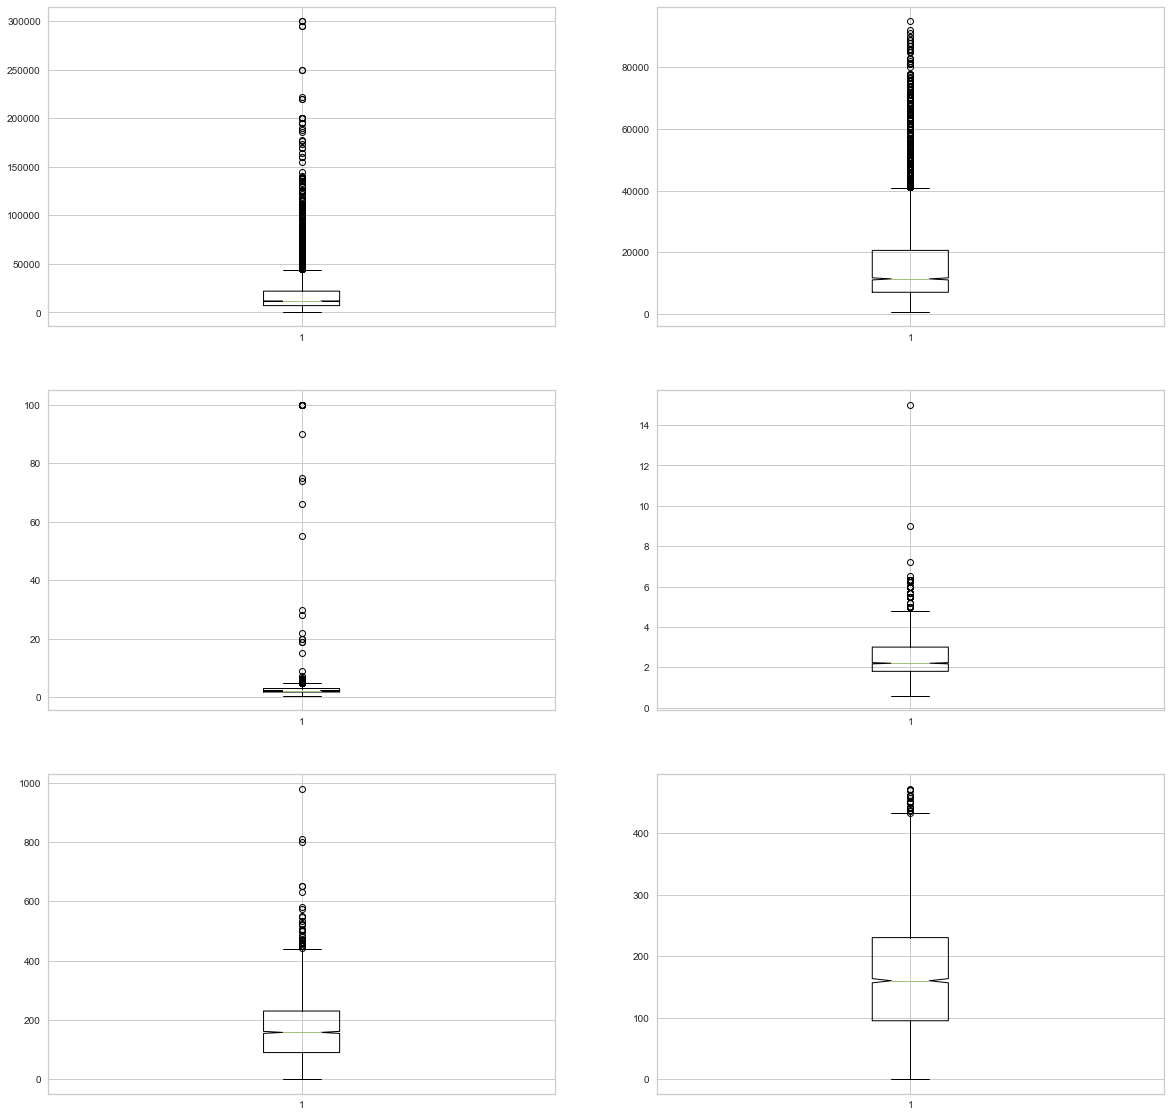

In [31]:
"""fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3, 2, sharex=False,sharey=False,figsize =(10,10))
sns.distplot(car_data.Price,color="blue",ax=ax1)
sns.distplot(targets,color="red",label="price",ax=ax2)
sns.distplot(car_data.EngineV,hist=True,label="Engine",ax=ax3)
sns.distplot(inputs.EngineV,hist=True,label="Engine",ax=ax4)
sns.distplot(car_data.Mileage,hist=True,color="green",ax=ax5)"""
data1 = [car_data.Price,targets,car_data.EngineV,inputs.EngineV,car_data.Mileage,inputs.Mileage]
k = ["car_data.Price","targets","car_data.EngineV","inputs.EngineV","car_data.Mileage","inputs.Mileage"]
fig, axs = plt.subplots(3,2, sharex=False,sharey=False,figsize =(20,20))
for i,j,k in zip(axs.ravel(),data1,k):
    i.boxplot(j,notch=True)
    i.set_label(str(k))

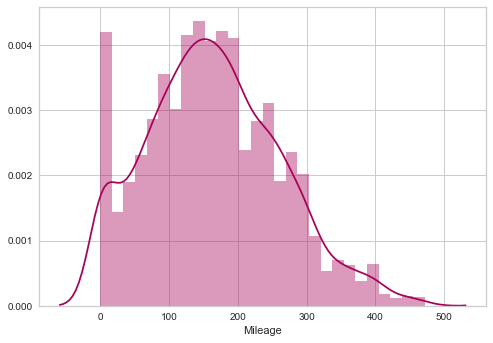

In [32]:
sns.distplot(inputs.Mileage,hist=True,color= "m")

In [33]:
data = model.transform(inputs)


In [34]:
X_train,x_test,Y_train,y_test = train_test_split(data,targets,test_size=0.24,random_state = 2)

In [35]:
X_train.shape,Y_train.shape,x_test.shape,y_test.shape

((2954, 17), (2954,), (933, 17), (933,))

In [36]:
model1 = LinearRegression()
model1.fit(X_train,Y_train)
from sklearn import tree
clf3 = tree.DecisionTreeRegressor(max_depth=12,min_samples_split=4,min_samples_leaf=1,splitter="best",random_state=5)
y = clf3.fit(X_train,Y_train)

In [37]:
y_pred2 = y.predict(x_test)

In [38]:
clf3.score(X_train,Y_train)

0.928257221363831

In [39]:
clf3.score(x_test,y_test)

0.706424925792233

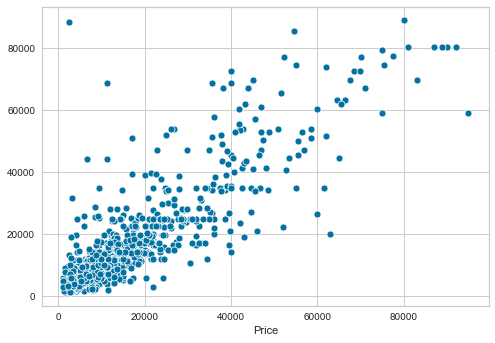

In [40]:
sns.scatterplot(y_test,y_pred2)

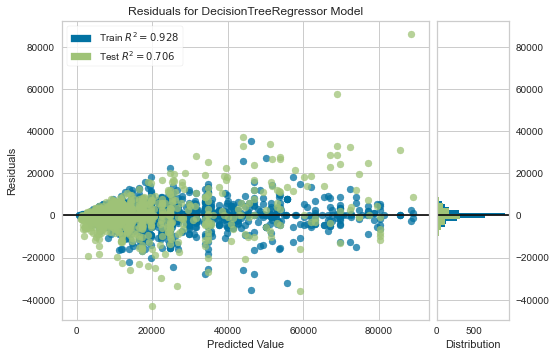

In [41]:
from yellowbrick.regressor import ResidualsPlot
visualizer1 = ResidualsPlot(clf3)
visualizer1.fit(X_train,Y_train)
visualizer1.score(x_test,y_test)
visualizer1.show()

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
kfold = RepeatedKFold(n_splits=10,n_repeats=5,random_state=2)
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [1,100,10000], 'gamma': [0.01,0.0000001], 'kernel':['poly']}                                                                       ]
regressor = SVR()
clf = GridSearchCV(regressor, parameter_candidates, cv=5 ,n_jobs=-1)
clf.fit(X_train, Y_train)
print('Best score for data:', clf.best_score_)
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)
#results = cross_val_score(regressor,data,targets, cv=kfold)
#print(results.mean(),results.std())

Best score for data: 0.5465252297894121
Best C: 1000
Best Kernel: linear
Best Gamma: 0.001


In [43]:
score=model1.score(X_train,Y_train)
print(score)

0.6147394933064891


In [44]:
y_pred = model1.predict(x_test)

In [45]:
score1 = model1.score(x_test,y_test)
score1

0.6296085473552333

In [46]:
mean_absolute_error(y_test,y_pred2)

4748.326292946737

In [47]:
housedata_new3.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV
10,Renault,11950.0,vagon,177,1.5,Diesel,yes,2011,Megane


In [48]:
housedata_new3.shape

(3887, 9)

In [49]:
housedata_new3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3887 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3887 non-null   object 
 1   Price         3887 non-null   float64
 2   Body          3887 non-null   object 
 3   Mileage       3887 non-null   int64  
 4   EngineV       3887 non-null   float64
 5   Engine Type   3887 non-null   object 
 6   Registration  3887 non-null   object 
 7   Year          3887 non-null   int64  
 8   Model         3887 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 463.7+ KB


In [50]:
housedata_new3.Mileage=housedata_new3.Mileage.astype(dtype="float64")
housedata_new3.Year=housedata_new3.Year.astype(dtype="float64")
housedata_new3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3887 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3887 non-null   object 
 1   Price         3887 non-null   float64
 2   Body          3887 non-null   object 
 3   Mileage       3887 non-null   float64
 4   EngineV       3887 non-null   float64
 5   Engine Type   3887 non-null   object 
 6   Registration  3887 non-null   object 
 7   Year          3887 non-null   float64
 8   Model         3887 non-null   object 
dtypes: float64(4), object(5)
memory usage: 463.7+ KB


C:\Users\ANNAM SHIVA KRISHNA\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [51]:
housedata_new3[(housedata_new3.Mileage == np.max(housedata_new3.Mileage)) | (housedata_new3.Price == np.min(housedata_new3.Price)) | (housedata_new3.Year == np.min(housedata_new3.Year))]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
141,Audi,600.0,sedan,112.0,1.6,Petrol,yes,1980.0,80
284,Renault,4900.0,van,472.0,2.5,Diesel,yes,2000.0,Master
288,Toyota,600.0,sedan,10.0,1.5,Petrol,yes,1979.0,Corolla
810,Mercedes-Benz,34999.0,sedan,150.0,2.8,Petrol,yes,1969.0,S 280


In [52]:
house = housedata_new3[["Body","Brand","Engine Type","Registration"]]
output = house.groupby(by = ["Brand","Engine Type","Registration"])
for x in output:
    print(x)

(('Audi', 'Diesel', 'no'),        Body Brand Engine Type Registration
19    vagon  Audi      Diesel           no
69    sedan  Audi      Diesel           no
70    sedan  Audi      Diesel           no
78    hatch  Audi      Diesel           no
93    vagon  Audi      Diesel           no
...     ...   ...         ...          ...
3983  vagon  Audi      Diesel           no
4029  vagon  Audi      Diesel           no
4049  sedan  Audi      Diesel           no
4143  vagon  Audi      Diesel           no
4279  vagon  Audi      Diesel           no

[74 rows x 4 columns])
(('Audi', 'Diesel', 'yes'),            Body Brand Engine Type Registration
7         vagon  Audi      Diesel          yes
24        sedan  Audi      Diesel          yes
87        sedan  Audi      Diesel          yes
147       vagon  Audi      Diesel          yes
148       other  Audi      Diesel          yes
...         ...   ...         ...          ...
4224      sedan  Audi      Diesel          yes
4233  crossover  Audi      Di

In [53]:
housedata_new3[((housedata_new3.Brand == "BMW") & (housedata_new3.Body == "sedan"))]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277.0,2.0,Petrol,yes,1991.0,320
6,BMW,6100.0,sedan,438.0,2.0,Gas,yes,1997.0,320
36,BMW,6000.0,sedan,300.0,2.8,Petrol,yes,1996.0,528
42,BMW,7700.0,sedan,326.0,2.8,Petrol,yes,1998.0,528
47,BMW,3700.0,sedan,231.0,2.5,Petrol,yes,1990.0,525
...,...,...,...,...,...,...,...,...,...
4298,BMW,11800.0,sedan,218.0,2.0,Petrol,yes,2006.0,320
4304,BMW,4300.0,sedan,200.0,2.0,Diesel,no,2002.0,320
4335,BMW,27900.0,sedan,38.0,2.0,Petrol,yes,2013.0,320
4341,BMW,6500.0,sedan,1.0,3.5,Petrol,yes,1999.0,535


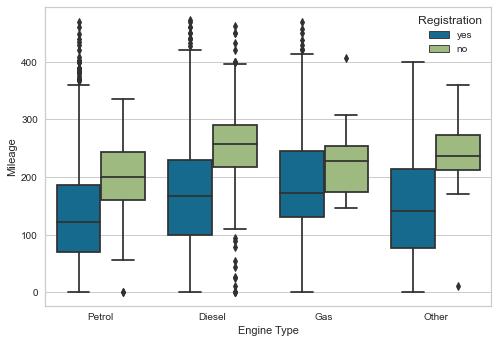

In [54]:
sns.boxplot("Engine Type","Mileage",data=housedata_new3,hue="Registration")

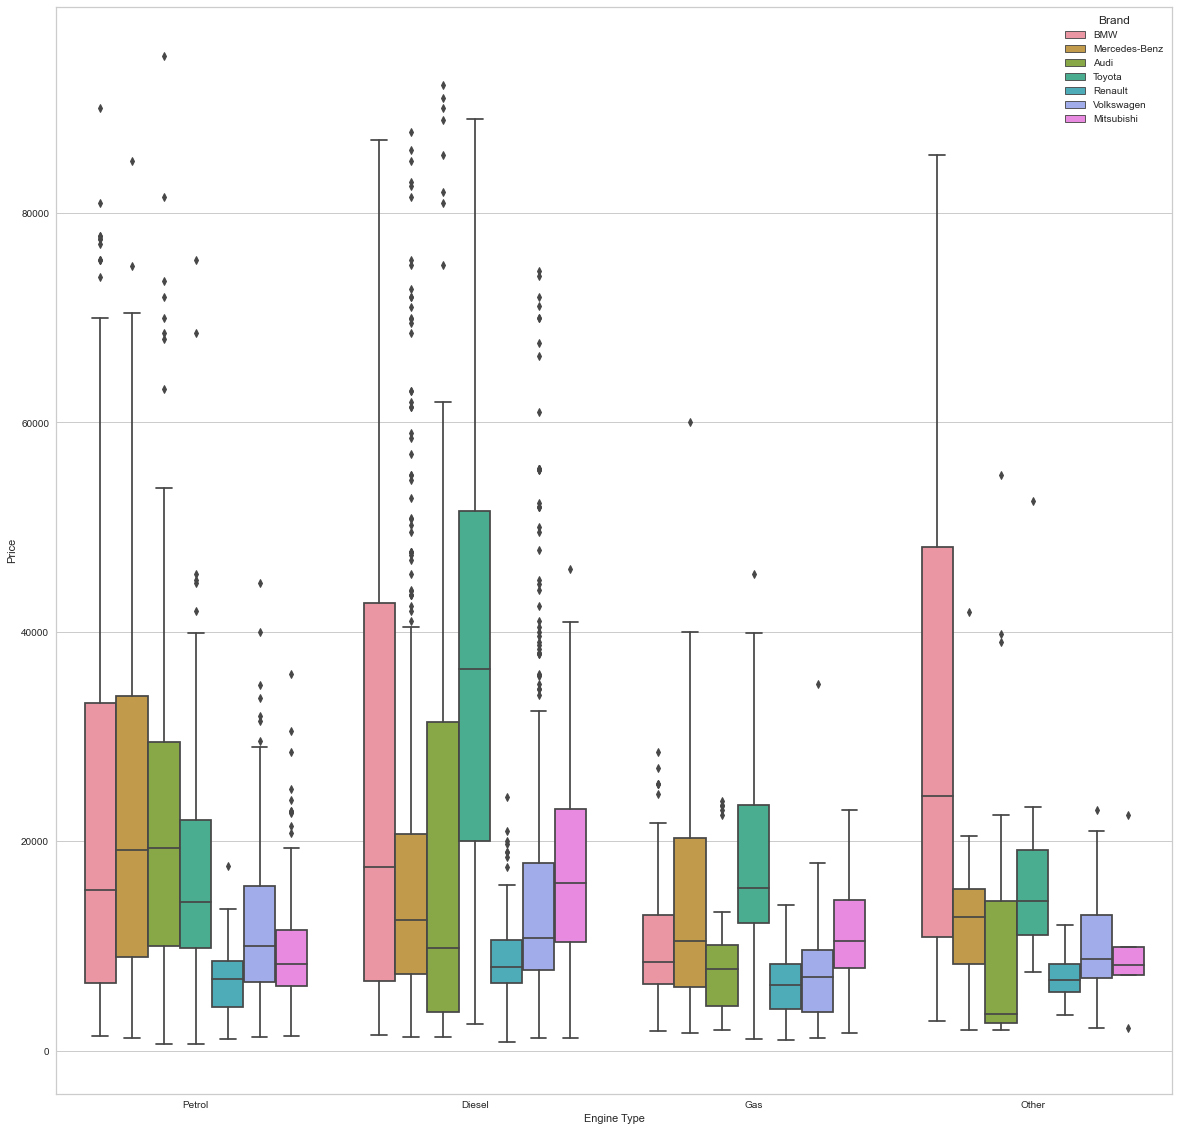

In [55]:
ax, fig = plt.subplots(1,1, sharex=False,sharey=False,figsize =(20,20))
sns.boxplot("Engine Type","Price",data=housedata_new3,hue="Brand")

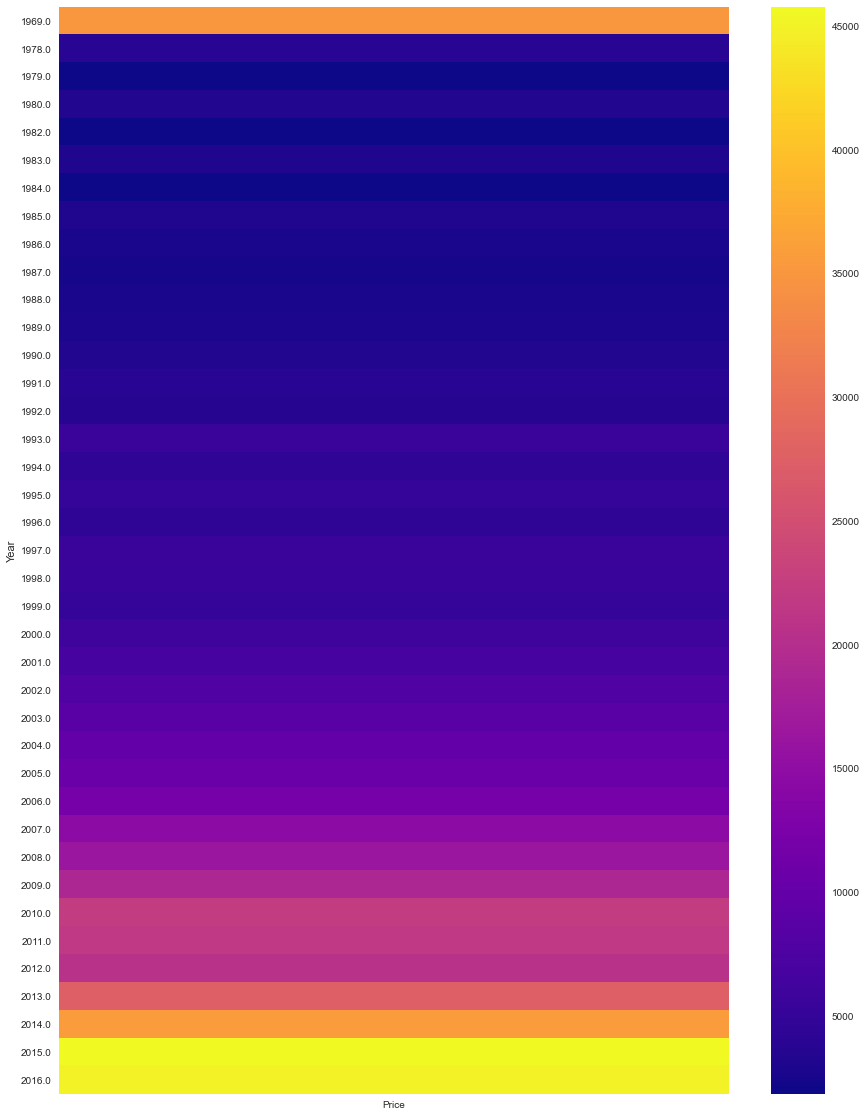

In [56]:
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
cmaps =OrderedDict()
cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']
ax, fig = plt.subplots(1,1,figsize=(15,20))
columns = housedata_new3.pivot_table("Price","Year")
heat = sns.heatmap(columns,cbar=True,cmap='plasma')

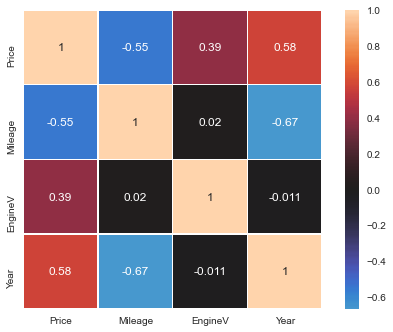

In [57]:
corr = housedata_new3.corr()
sns.heatmap(corr,annot=True,center=0,square=True, linewidths=.5)

In [58]:
print(X_train.shape)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train, j) for j in range(X_train.shape[1])]
vif_df = pd.DataFrame()
vif_df["columns"] = inputs.columns
vif_df["VIF"] = vif
vif_df.head(20)

(2954, 17)


,columns,VIF
0,Mileage,1.258208
1,EngineV,1.506031
2,Brand_BMW,2.240488
3,Brand_Mercedes-Benz,2.509201
4,Brand_Mitsubishi,1.793970
5,Brand_Renault,2.188818
6,Brand_Toyota,2.162290
7,Brand_Volkswagen,2.748583
8,Body_hatch,1.633053
9,Body_other,1.532694


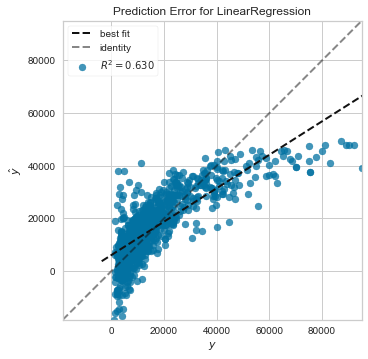

In [59]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model1)
visualizer.fit(X_train,Y_train)
visualizer.score(x_test,y_test)
visualizer.show()

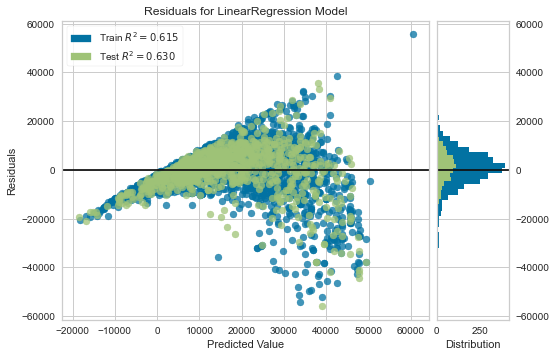

In [60]:
from yellowbrick.regressor import ResidualsPlot
visualizer1 = ResidualsPlot(model1)
visualizer1.fit(X_train,Y_train)
visualizer1.score(x_test,y_test)
visualizer1.show()